# FITS Data Plotter

Read in luminosity and energy tables from FITS files and plot them here just to check the stored values.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from glob import glob
from astropy.table import Table
from astropy import units as u

grid_style =   {    'alpha'  : '1.0',
                 'linestyle' : ':'}
legend_style = { 'fontsize' : '14'   }
font_syle =    {     'size' : '14'   }
figure_style = { 'max_open_warning' : 0 }

mpl.rc('font', **font_syle)
mpl.rc('grid', **grid_style)
mpl.rc('legend', **legend_style)
mpl.rc('figure', **figure_style)

## Plotting Function(s)

In [2]:
def plot_luminosity(data, modelname):
    """Plot luminosity stored in the data tables.
    
    Parameters
    ----------
    data : `astropy.table.Table`
        Table with neutrino luminosity vs. time.
    modelname : str
        Name of the model being plotted.
    
    Returns
    -------
    fig : `matplotlib.Figure`
         Figure for further manipulation.
    """
    t, Lnue, Lnuebar, Lnux = data['TIME'], 1e-51*data['L_NU_E'], 1e-51*data['L_NU_E_BAR'], 1e-51*data['L_NU_X']
    
    # Plot data in three panels. First is start time to 50 ms.
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    ax = axes[0]
    t0 = t.to('s')[0]
    ax.plot(t.to('ms'), Lnue, label=r'${\nu_e}$')
    ax.plot(t.to('ms'), Lnuebar, label=r'${\bar{\nu}_e}$')
    ax.plot(t.to('ms'), Lnux, label=r'${\nu_x}$')
    ax.set(xlabel='time [ms]',
           xlim=(t0.to('ms').value, 50),
           ylabel=r'luminosity [$10^{51}$ erg s$^{-1}$]')
    l = ax.legend()
    l.get_frame().set_linewidth(0)
    ax.grid()
    
    # Second panel is 0.05 s to 0.5 s.
    cut = np.logical_and(t > 0.05, t < 0.5)
    ax = axes[1]
    ax.plot(t[cut], Lnue[cut], label=r'$L_{\nu_e}$')
    ax.plot(t[cut], Lnuebar[cut], label=r'$L_{\bar{\nu}_e}$')
    ax.plot(t[cut], Lnux[cut], label=r'$L_{\nu_x}$')
    ax.set(xlabel='time [s]',
           xlim=(0.05, 0.5))
    ax.grid()
    
    # Third panel is 0.5 s to final time.
    ax = axes[2]
    
    # Make sure tmax > 0.5.
    if t[-1] >= 0.5:
        cut = t > 0.5
        ax.plot(t[cut], Lnue[cut], label=r'$L_{\nu_e}$')
        ax.plot(t[cut], Lnuebar[cut], label=r'$L_{\bar{\nu}_e}$')
        ax.plot(t[cut], Lnux[cut], label=r'$L_{\nu_x}$')
        ax.set(xlabel='time [s]',
               xlim=(0.5, t[-1]))
        ax.grid()
    else:
        ax.axis('off')
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    fig.suptitle(modelname, fontsize=14)
    return fig

## Data from Nakazato et al., 2013, 2015

CCSN neutrino models from Nakazato et al., 2013 and 2015. Data are public and
taken from [their website](http://asphwww.ph.noda.tus.ac.jp/snn/).

The citation for use of the database is: *Supernova Neutrino Light Curves and
Spectra for Various Progenitor Stars: From Core Collapse to Proto-neutron Star
Cooling*, K. Nakazato, K. Sumiyoshi, H. Suzuki, T. Totani, H. Umeda, and S.
Yamada, [Astrophys. J. Supp. 205 (2013)
2](http://dx.doi.org/10.1088/0067-0049/205/1/2), [arXiv:1210.6841](http://arxiv.org/abs/1210.6841).

If the BH model with LS220 EOS is used, the citation is: *Spectrum of the
Supernova Relic Neutrino Background and Metallicity Evolution of Galaxies*, 
K. Nakazato, E. Mochida, Y. Niino, and H. Suzuki, 
[Astrophys. J. 804 (2015) 75](http://dx.doi.org/10.1088/0004-637X/804/1/75), [arXiv:1503.01236](http://arxiv.org/abs/1503.01236).

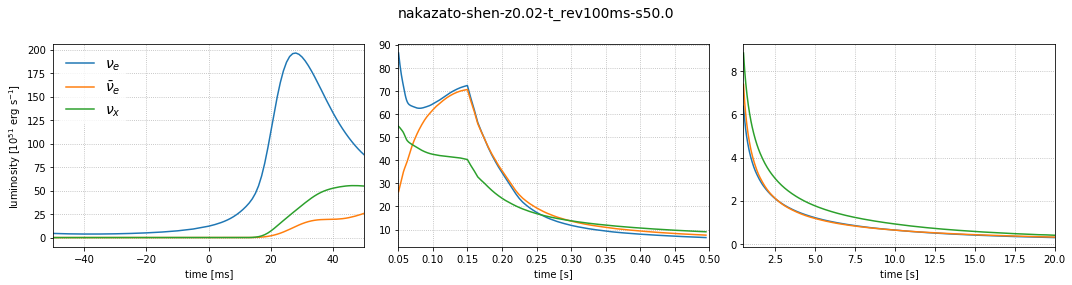

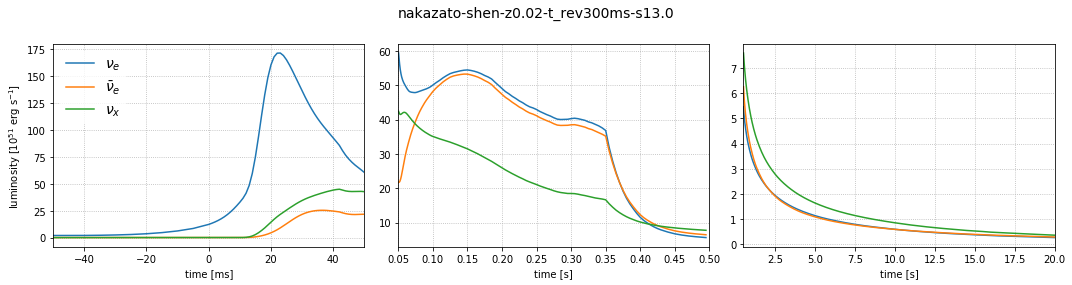

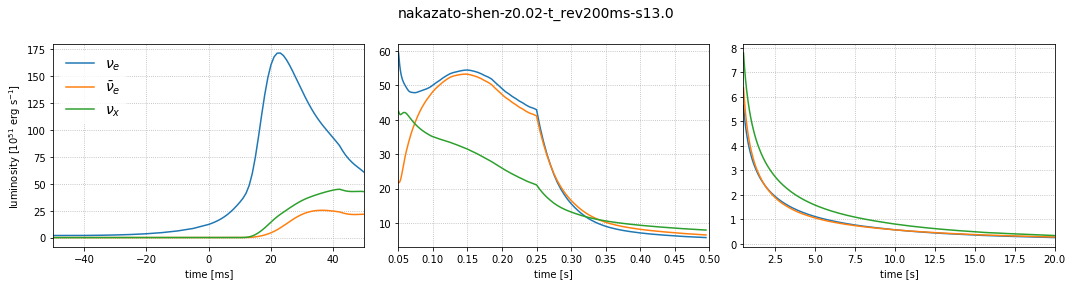

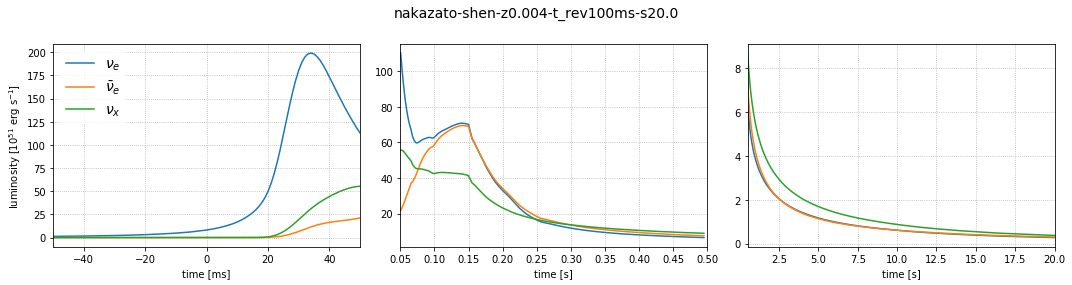

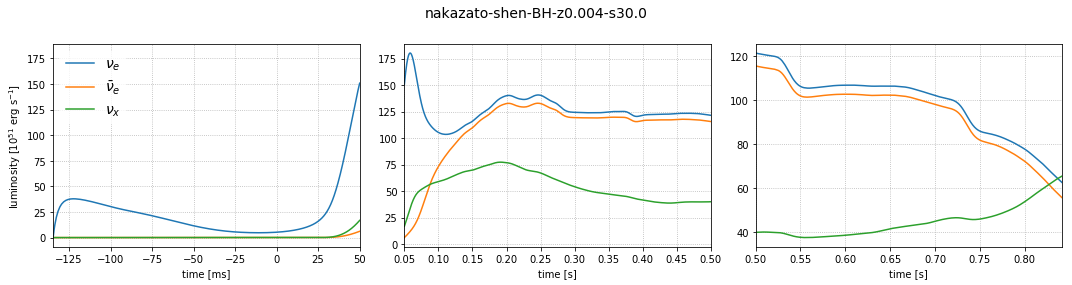

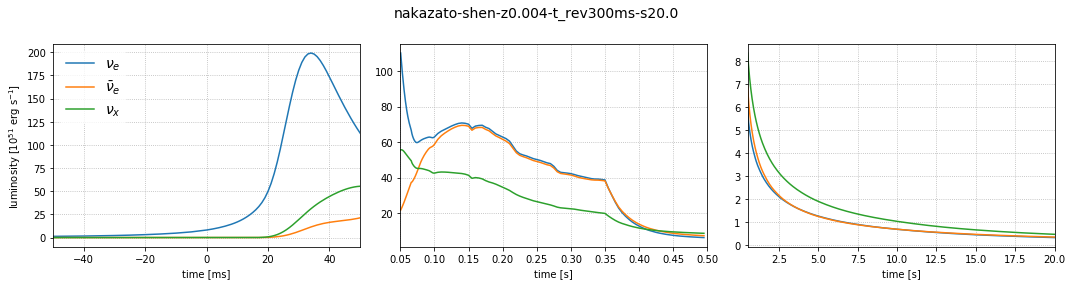

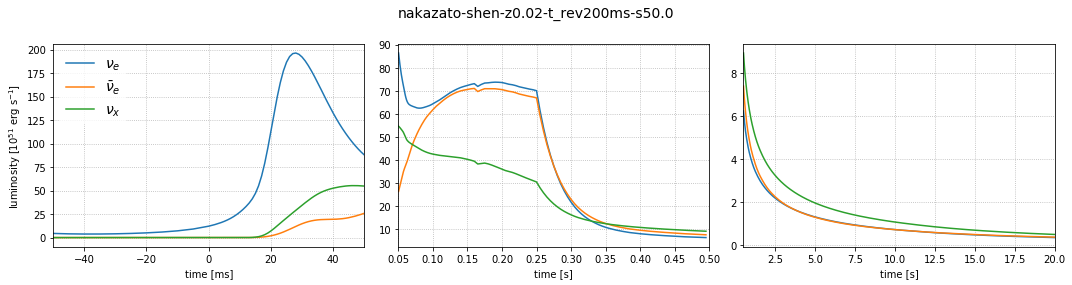

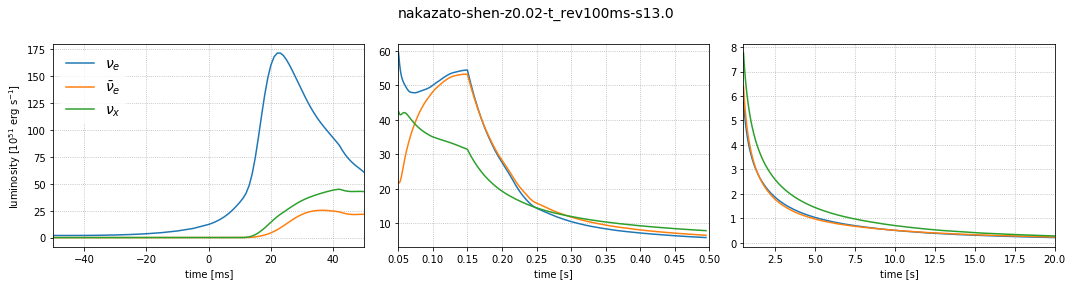

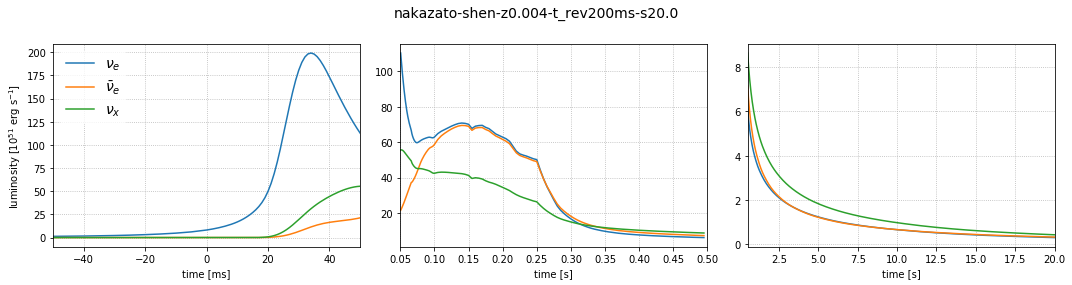

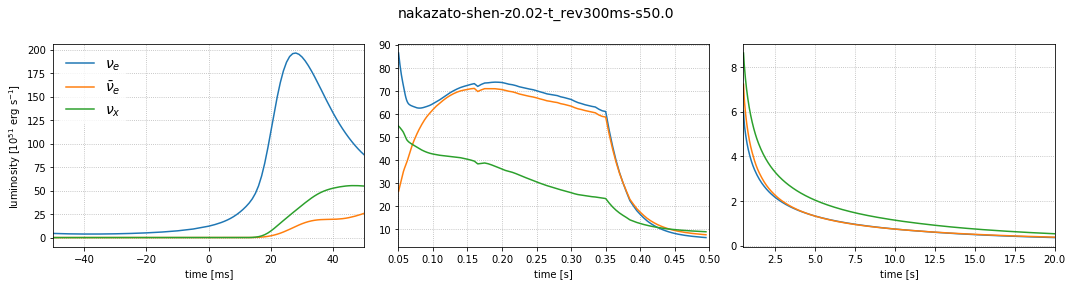

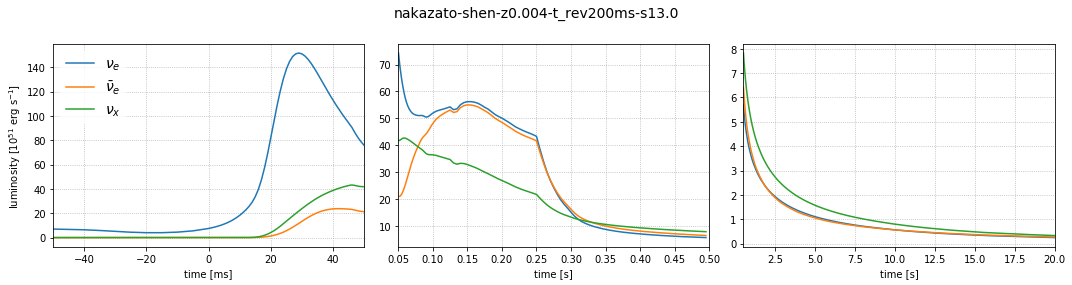

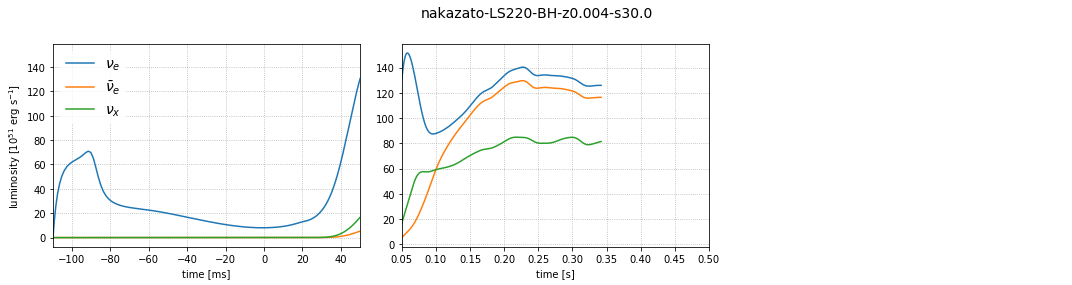

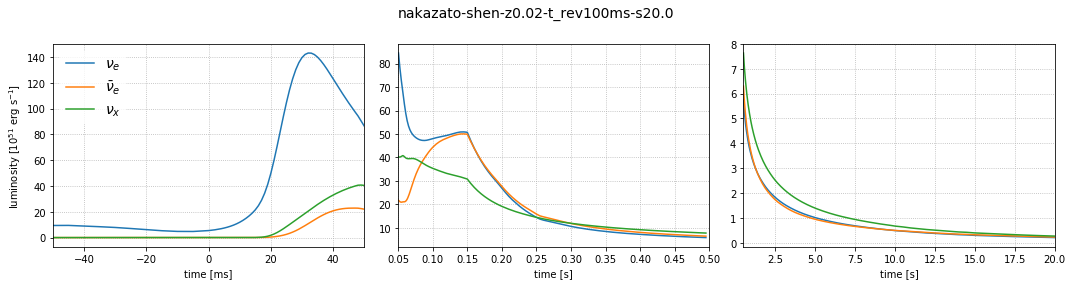

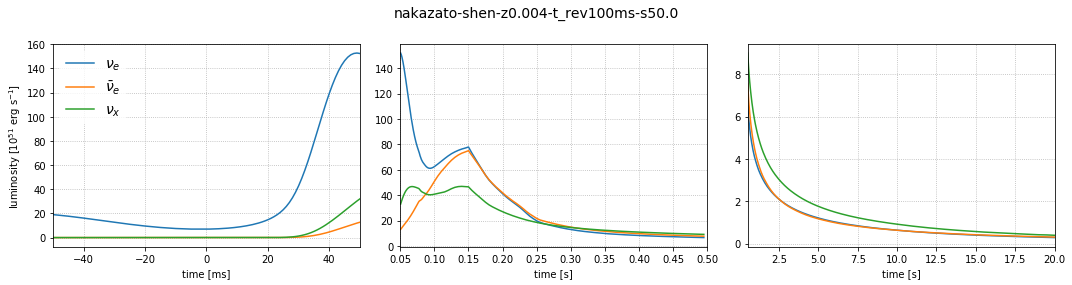

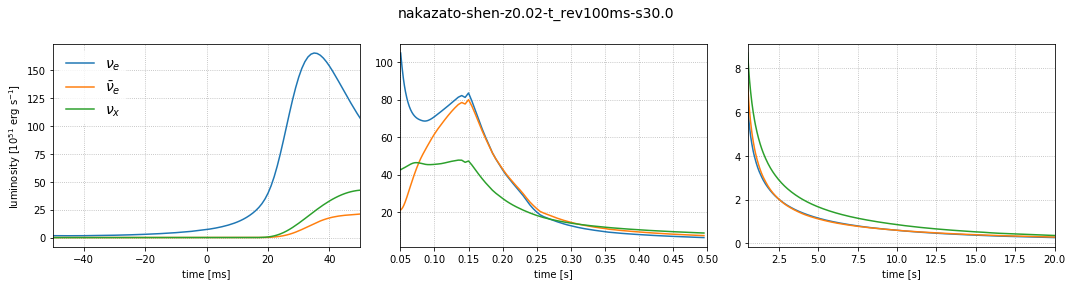

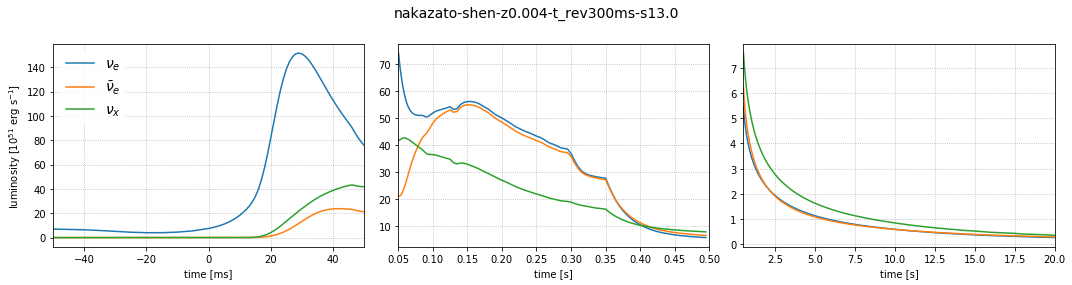

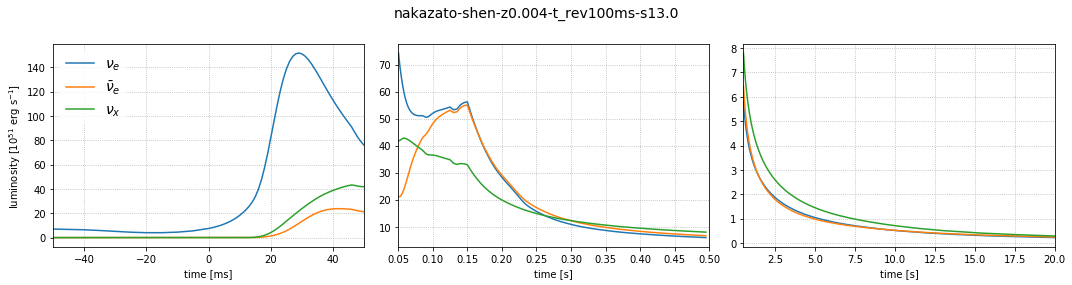

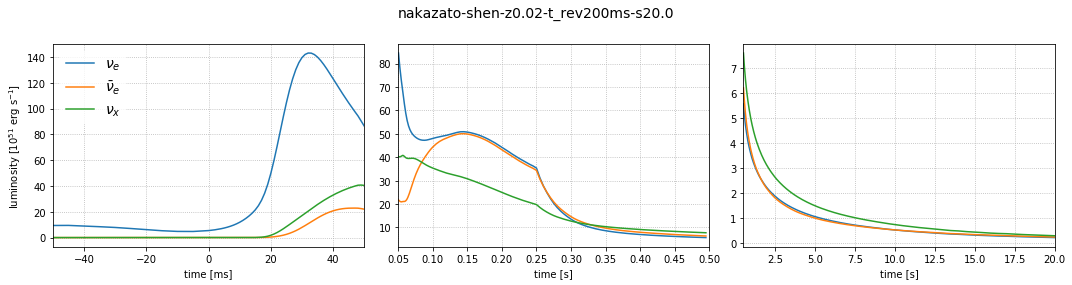

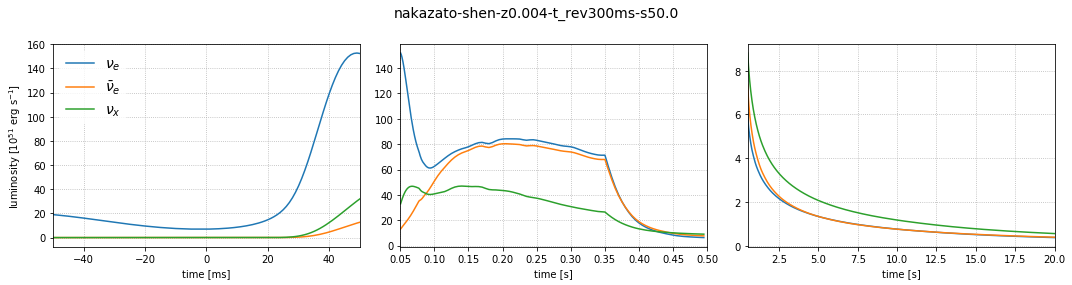

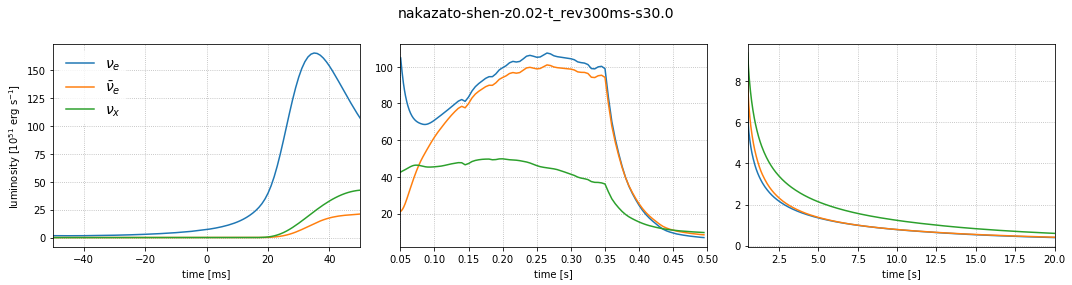

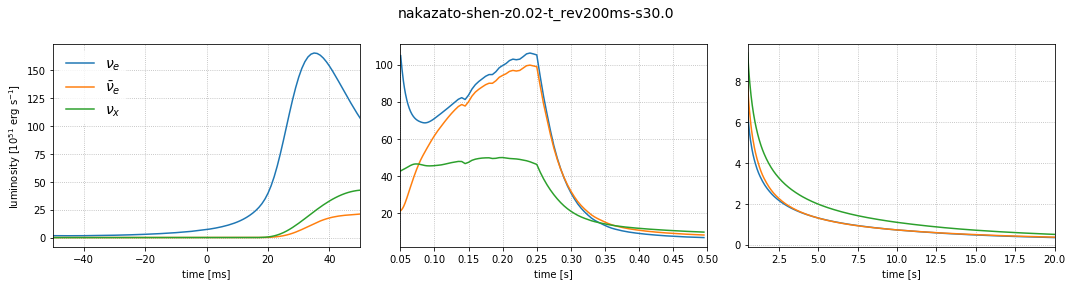

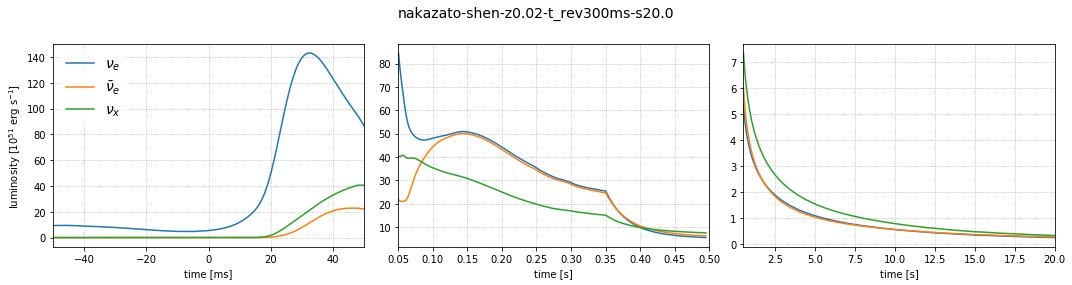

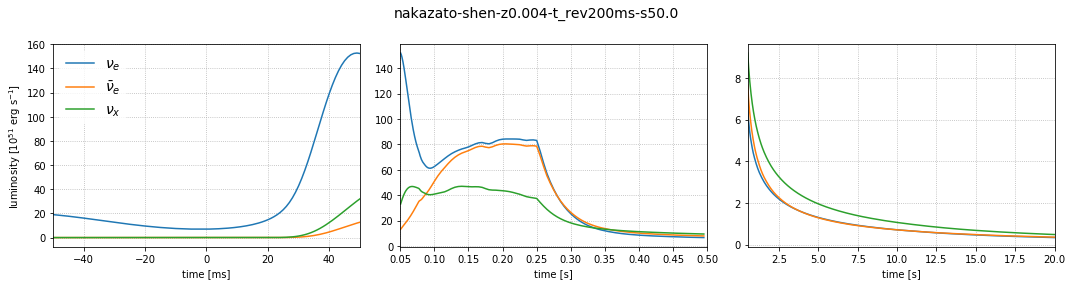

In [3]:
files = glob('../Nakazato_2013/*.fits')
for i, f in enumerate(files):
    basename = os.path.basename(f)
    modelname = basename.replace('.fits', '')
    data = Table.read(f)
    fig = plot_luminosity(data, modelname)